<a href="https://colab.research.google.com/github/AwaisAli37405/Deep_Learning/blob/master/DeepLearning_with_process_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep Learning with Process Mining

- To access the event logs please give an access to the folder in your drive

In [13]:
# access the input folder in a google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

# Specify the folder path
folder_path = '/content/drive/MyDrive/Colab\ Notebooks/event_logs/'

# List the contents of the folder
!ls {folder_path}

Mounted at /content/drive
BPI_Challenge_2012_W_Two_TS.csv  confidential_2000.csv	       insurance.csv
BPI_Challenge_2017_W_Two_TS.csv  ConsultaDataMining201618.csv  Production.csv
confidential_1000.csv		 cvs_pharmacy.csv	       PurchasingExample.csv


In [22]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [23]:
import os
folder_path = '/content/drive/MyDrive/Colab Notebooks/event_logs/'
files = os.listdir(folder_path)
print(files)

['ConsultaDataMining201618.csv', 'confidential_1000.csv', 'confidential_2000.csv', 'BPI_Challenge_2012_W_Two_TS.csv', 'insurance.csv', 'Production.csv', 'PurchasingExample.csv', 'cvs_pharmacy.csv', 'BPI_Challenge_2017_W_Two_TS.csv']


In [27]:
import os
# Accessing the 'cvs_pharmacy.csv' file
file_path = os.path.join(folder_path, 'cvs_pharmacy.csv')  # Assuming 'cvs_pharmacy.csv' is in 'event_logs' folder
# Verify if the file exists before attempting to read it
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    # Now you can work with the DataFrame 'df'
    print(df.head())  # To see the output, run the code.
else:
    print(f"Error: File not found at {file_path}")
    print("Please check the file path and ensure the file exists.")

                          task  caseid                    user  \
0   Enter prescription details    5320       Technician-000003   
1   Check if refill is allowed    5320  Pharmacy System-000001   
2                    Check DUR    5320  Pharmacy System-000001   
3              Check Insurance    5320  Pharmacy System-000001   
4  Pack the drugs (Production)    5320       Technician-000003   

             LogType  case_variant                                 elementId  \
0  MXML.EnactmentLog             1  sid-B9F72F21-DC8A-4873-9E04-B19ED7381ADC   
1  MXML.EnactmentLog             1  sid-0B0AE587-EE27-414E-A051-D91E1866E1C3   
2  MXML.EnactmentLog             1  sid-2B439B6B-4DD1-4D40-902D-43B7C4F215AB   
3  MXML.EnactmentLog             1  sid-D859AC4F-3984-4A6B-8366-62B226C4DD53   
4  MXML.EnactmentLog             1  sid-A4A84A0D-A58B-4650-A3F2-D1967DB8C146   

                                  processId  resourceCost  \
0  sid-841F35F3-ABD1-4ABA-B8AD-28581544A987      0.963500   


Event Log Preprocessing

In [31]:
# renamming the columns and replacing the actual resource and tasks with dummy values

import pandas as pd

# Assuming 'df' is your DataFrame

# 1. Rename columns
column_mapping = {
    'task': 'activity',
    'user': 'resource',
    'start_timestamp': 'start',
    'end_timestamp':'end'
}
df = df.rename(columns=column_mapping)
print(df.columns)

# 2. Replace resource and task values with dummy values
resource_column = 'resource'  # Replace with the actual column name
task_column = 'activity'  # Replace with the actual column name

# Create unique dummy values using dictionaries
resource_mapping = {resource: f'Resource_{i+1}' for i, resource in enumerate(df[resource_column].unique())}
task_mapping = {task: f'Task_{i+1}' for i, task in enumerate(df[task_column].unique())}

# Replace values in the DataFrame
df[resource_column] = df[resource_column].map(resource_mapping)
df[task_column] = df[task_column].map(task_mapping)

# Now 'df' has renamed columns and dummy values for resources and tasks
print(df.head())


Index(['activity', 'caseid', 'resource', 'LogType', 'case_variant',
       'elementId', 'processId', 'resourceCost', 'resourceId', 'end', 'start'],
      dtype='object')
  activity  caseid    resource            LogType  case_variant  \
0   Task_1    5320  Resource_1  MXML.EnactmentLog             1   
1   Task_2    5320  Resource_2  MXML.EnactmentLog             1   
2   Task_3    5320  Resource_2  MXML.EnactmentLog             1   
3   Task_4    5320  Resource_2  MXML.EnactmentLog             1   
4   Task_5    5320  Resource_1  MXML.EnactmentLog             1   

                                  elementId  \
0  sid-B9F72F21-DC8A-4873-9E04-B19ED7381ADC   
1  sid-0B0AE587-EE27-414E-A051-D91E1866E1C3   
2  sid-2B439B6B-4DD1-4D40-902D-43B7C4F215AB   
3  sid-D859AC4F-3984-4A6B-8366-62B226C4DD53   
4  sid-A4A84A0D-A58B-4650-A3F2-D1967DB8C146   

                                  processId  resourceCost  \
0  sid-841F35F3-ABD1-4ABA-B8AD-28581544A987      0.963500   
1  sid-841F35F3-ABD1-4

In [34]:
# now correcting the timestamp values in the above event log
df['start'] = pd.to_datetime(df['start'])
df['end'] = pd.to_datetime(df['end'])

# remove all the extra columns other than the following
df = df[['caseid', 'activity', 'resource', 'start', 'end']]
print(df.head())
# now we have a data frame with only the required information for analysis and evaluation


   caseid activity    resource                   start                     end
0    5320   Task_1  Resource_1 2019-04-30 19:16:51.439 2019-04-30 19:19:10.183
1    5320   Task_2  Resource_2 2019-04-30 19:19:10.183 2019-04-30 19:19:10.183
2    5320   Task_3  Resource_2 2019-04-30 19:19:10.183 2019-04-30 19:19:10.183
3    5320   Task_4  Resource_2 2019-04-30 19:19:10.183 2019-04-30 19:19:10.183
4    5320   Task_5  Resource_1 2019-05-02 12:25:40.126 2019-05-02 12:28:14.988


For performing the Explanatory data analysis based on time such as remining time, time to start the next activity in a case and processing time

In [42]:
# extract the processing time
# Assuming df is your DataFrame

# Processing time
df['processing_time'] = (df['end'] - df['start']).dt.total_seconds()

# Waiting time
df['waiting_time'] = df.groupby('caseid')['start'].diff().dt.total_seconds()
df['waiting_time'] = df['waiting_time'].fillna(0)

# Time to start next activity
df['time_to_next_activity'] = df.groupby('caseid')['start'].shift(-1) - df['end']
df['time_to_next_activity'] = df['time_to_next_activity'].dt.total_seconds()
df['time_to_next_activity'] = df['time_to_next_activity'].fillna(0)

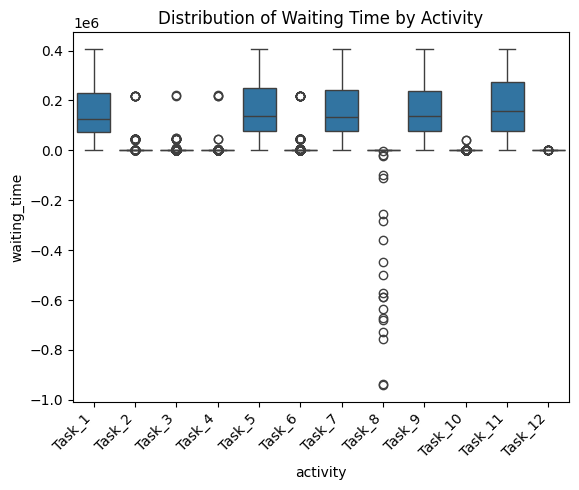

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot example:
sns.boxplot(x='activity', y='waiting_time', data=df)
plt.title('Distribution of Waiting Time by Activity')
plt.xticks(rotation=45, ha='right')
plt.show()

  # Similar code for Violin plots and Histograms with different x-axis variables

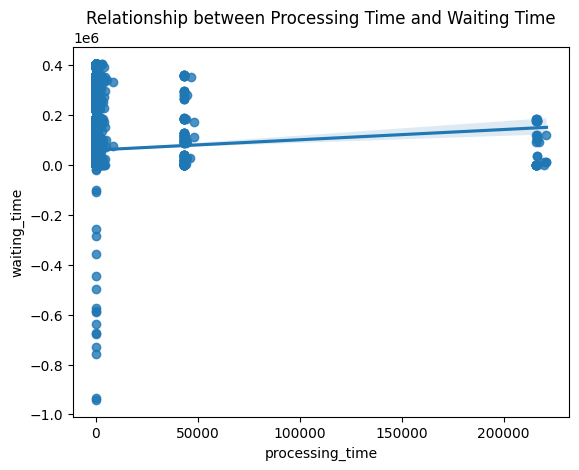

In [47]:
sns.regplot(x='processing_time', y='waiting_time', data=df)
plt.title('Relationship between Processing Time and Waiting Time')
plt.show()

  # Similar code for other numerical features like 'time_to_next_activity'

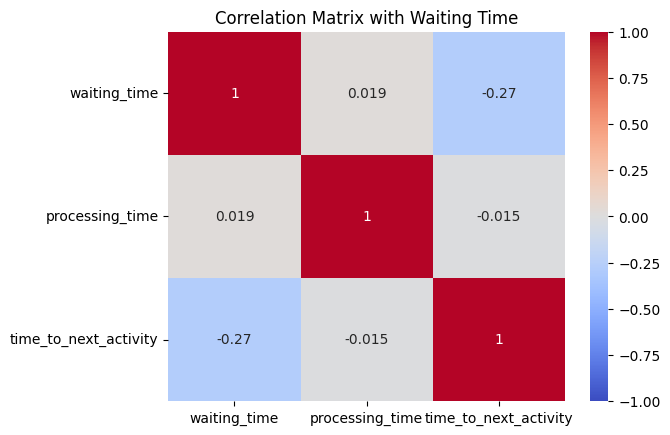

In [48]:
correlation_matrix = df[['waiting_time', 'processing_time', 'time_to_next_activity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix with Waiting Time')
plt.show()

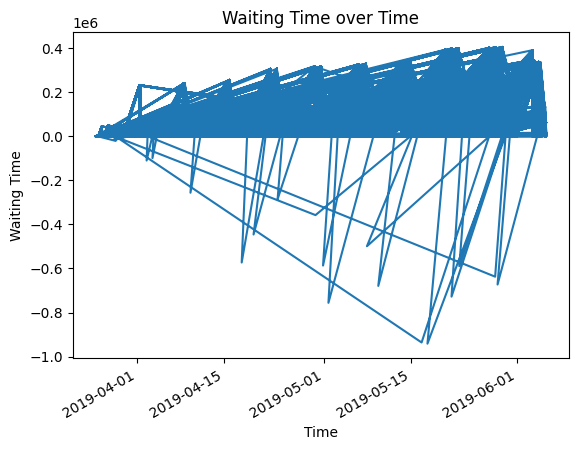

In [49]:
df.set_index('start')['waiting_time'].plot()
plt.title('Waiting Time over Time')
plt.xlabel('Time')
plt.ylabel('Waiting Time')
plt.show()

  # You can also group by activity or resource before plotting

The second stage of preprocessing the event log involves extracting the prefixes for each case

In [39]:
# extract the prefixes of each case in a an event log and create a new dataframe
import pandas as pd

def extract_prefixes(event_log):
    """
    Extracts prefixes of each case in an event log.

    Args:
        event_log: DataFrame containing the event log.
            It should have columns for case ID and activity name.

    Returns:
        DataFrame with prefixes for each case.
    """

    # Assuming 'case_id' and 'activity' are column names for case ID and activity
    all_prefixes = []
    for case_id, group in event_log.groupby('caseid'):
        # Sort the group by start time
        group = group.sort_values(by='start')
        for i in range(1, len(group) + 1):
            prefix = group['activity'][:i].tolist()
            prefix_len = len(prefix)  # Calculate prefix length
            # Get the row corresponding to the current prefix
            prefix_row = group.iloc[i - 1].copy()
            # Add prefix and prefix_len as new columns
            prefix_row['prefix'] = prefix
            prefix_row['prefix_len'] = prefix_len
            all_prefixes.append(prefix_row)

    return pd.DataFrame(all_prefixes)

# Assuming 'df' is your event log DataFrame
prefix_df = extract_prefixes(df)
print(prefix_df)

       caseid activity    resource                   start  \
69399       0   Task_8  Resource_4 2019-03-25 09:00:00.000   
69400       0   Task_1  Resource_5 2019-03-25 09:01:41.348   
69401       0   Task_2  Resource_2 2019-03-25 09:04:13.469   
69402       0   Task_3  Resource_2 2019-03-25 09:04:13.469   
69403       0   Task_4  Resource_2 2019-03-25 09:04:13.469   
...       ...      ...         ...                     ...   
48406    9999   Task_4  Resource_2 2019-05-31 20:45:20.381   
48407    9999   Task_9  Resource_4 2019-06-04 17:20:51.178   
48408    9999   Task_5  Resource_5 2019-06-05 13:52:33.049   
48409    9999   Task_6  Resource_3 2019-06-05 13:55:46.681   
48410    9999   Task_7  Resource_1 2019-06-05 15:44:52.696   

                          end  \
69399 2019-03-25 09:01:41.348   
69400 2019-03-25 09:04:13.469   
69401 2019-03-25 09:04:13.469   
69402 2019-03-25 09:04:13.469   
69403 2019-03-25 09:04:13.469   
...                       ...   
48406 2019-05-31 20:45:2

In [40]:
# extract the processing time
